## Data Preprocessing

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', '{:.5f}'.format) 

In [ ]:
# Load data
df = pd.read_sas('LLCP2024.XPT', format='xport')
df.to_csv('BRFSS_2024.csv', index=False)
df = pd.read_csv('BRFSS_2024.csv')

In [2]:
df.shape[0]

457670

In [3]:
df.shape[1]

301

In [4]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_LCSCTSN,_LCSPSTF,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK3,_RFDRHV9,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.00000,2.00000,b'02282024',b'02',b'28',b'2024',1100.00000,b'2024000001',2024000001.00000,1.00000,...,NaN,9.00000,2.00000,0.00000,1.00000,0.00000,1.00000,1.00000,2.00000,2.00000
1,1.00000,2.00000,b'02212024',b'02',b'21',b'2024',1100.00000,b'2024000002',2024000002.00000,1.00000,...,4.00000,9.00000,2.00000,0.00000,1.00000,0.00000,1.00000,1.00000,1.00000,2.00000
2,1.00000,2.00000,b'02212024',b'02',b'21',b'2024',1100.00000,b'2024000003',2024000003.00000,1.00000,...,4.00000,2.00000,1.00000,100.00000,2.00000,1400.00000,1.00000,NaN,NaN,2.00000
3,1.00000,2.00000,b'02282024',b'02',b'28',b'2024',1100.00000,b'2024000004',2024000004.00000,1.00000,...,NaN,9.00000,2.00000,0.00000,1.00000,0.00000,1.00000,1.00000,1.00000,2.00000
4,1.00000,2.00000,b'02212024',b'02',b'21',b'2024',1100.00000,b'2024000005',2024000005.00000,1.00000,...,3.00000,9.00000,2.00000,0.00000,1.00000,0.00000,1.00000,NaN,NaN,2.00000


In [5]:
# Filter to ACE module respondents
# Did you live with anyone who was depressed, mentally ill, or suicidal?
df_ace = df[df['ACEDEPRS'].notna()].copy()

df_ace.shape

(39283, 301)

In [6]:
# Check which states included ACE module

states={12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 51: 'Virginia', 38: 'North Dakota', 72: 'Puerto Rico', 32: 'Nevada', 78: 'Virgin Islands'}

print('States with ACE module questions, and number of respondents:')
for state_code, count in df_ace['_STATE'].value_counts().items():
    print(f"{states.get(state_code, f'Code {state_code}')}: {count}")
print('Total respondents:', df_ace.shape[0])

States with ACE module questions, and number of respondents:
Florida: 9899
Hawaii: 5896
Georgia: 5635
Virginia: 5382
North Dakota: 4950
Puerto Rico: 4174
Nevada: 2172
Virgin Islands: 1175
Total respondents: 39283



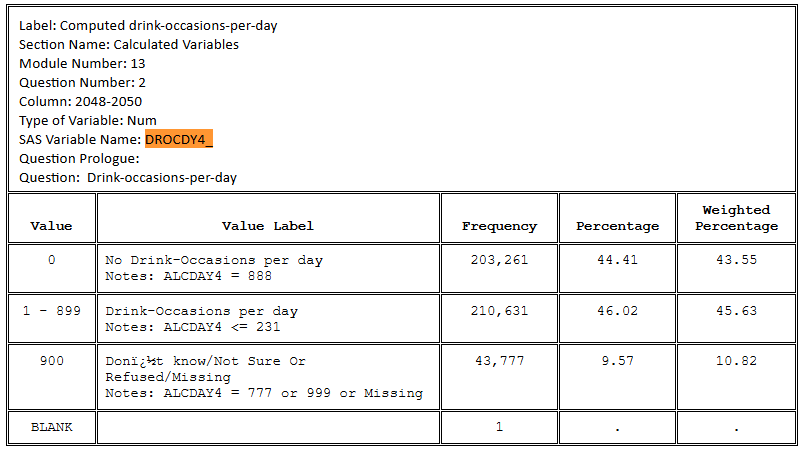
1. <b>Risky drinking is defined by >2 drinks/day by the U.K.'s National Health Service.</b><br>
    If you drink less than 14 units a week, this is considered low-risk drinking.
    It's called "low risk" rather than "safe" because there's no safe drinking level.
    The type of illnesses you can develop after 10 to 20 years of regularly drinking more than 14 units a week include:
    - Mouth cancer, throat cancer and breast cancer
    - Stroke
    - Heart disease
    - Liver disease
    - Brain damage
    - Damage to the nervous system
      >National Health Service: https://www.nhs.uk/live-well/alcohol-advice/the-risks-of-drinking-too-much/#:~:text=Regularly%20drinking%20more%20than%2014,has%20emerged%20in%20recent%20years.
      
   <b>CDC: </b>Excessive alcohol use includes:
    - Binge drinking—Four or more drinks for women, or five or more drinks for men during an occasion.
    - Heavy drinking—Eight or more drinks for women, or 15 or more drinks for men during a week.

<br>
2. <b>Racial discrimination in the United States is a source of traumatic stress, poorer health outcomes, and increased health risk behaviors for minoritized communities.</b>

   - In a study on PTSD in Mexican-American adolescents in Northern California, Flores, et. al found, "[S]upport for the notion of race-based traumatic stress, specifically, that perceived discrimination may be traumatizing for Mexican American adolescents ... Adolescents who experienced heightened posttraumatic stress symptoms reported more alcohol use, more other drug use, involvement in more fights, and more sexual partners." 
     > Flores, E., Tschann, J. M., Dimas, J. M., Pasch, L. A., & de Groat, C. L. (2010). 
   > Perceived racial/ethnic discrimination, posttraumatic stress symptoms, and health 
   > risk behaviors among mexican american adolescents. *Journal of Counseling 
   > Psychology, 57*(3), 264-273. doi: https://doi.org/10.1037/a0020026

In [7]:
########## new feature engineering / exploration

#1
more_than_2_drinks_per_day = df_ace.loc[df_ace['DROCDY4_']>=2] # DROCDY4_: Drink occasions per day.
print("Respondents who drink >= 2 drinks per day:",len(more_than_2_drinks_per_day))  

#2
non_white_respondents = df_ace.loc[df_ace['_IMPRACE']>1] # _IMPRACE: Reported race/ethnicity OR imputed value, if respondent refused to give race/ethnicity. The imputed value will be the most common race/ethnicity response for that region of the state
print("Respondents whose reported Race is NOT white:",len(non_white_respondents)) 

#3
more_than_5_drinks = df_ace.loc[ (df_ace['MAXDRNKS']>5) & (df_ace['MAXDRNKS']<=76) ] # MAXDRNKS: During the past 30 days, what is the largest number of drinks you had on any occasion?
print("Respondents who have binged 5 or more drinks at least once in the last 30 days:",len(more_than_5_drinks)) 




Respondents who drink >= 2 drinks per day: 18514
Respondents whose reported Race is NOT white: 15758
Respondents who have binged 5 or more drinks at least once in the last 30 days: 2594


In [8]:
# Create target variable, risky drinking (binge OR heavy OR >2 drinks/day)
print('ACE Respondents:')
df_ace['risky_drinking'] = ( (df_ace['_RFBING6'] == 2)             |    # listed: 2 = 12.01% of data
                             (df_ace['_RFDRHV9'] == 2).astype(int) |    # listed: 2 = 5.28% of data
                             (df_ace['DROCDY4_'] != 0) & 
                             (df_ace['DROCDY4_'] != 100) & 
                             (df_ace['DROCDY4_'] != 900) &
                             (df_ace['DROCDY4_'] >= 4) )     #tested >=1, >=2, and >=3 -- all returned 44.09% of ACE respondents suggesting risky drinking behavior
ace_drinkers = sum(df_ace['risky_drinking'])
print(df_ace['risky_drinking'].value_counts()) 
print(f'{(ace_drinkers/len(df_ace))*100:.2f}% of ACE Respondents suggested risky drinking behavior. \n')


# Do ACE respondents' drinking habits align with ALL respondents?   -- yes
print('Random Sample of all Respondents:')
df_sample = df.sample(frac=0.2, random_state=0)
df_sample['risky_drinking'] = ( (df_sample['_RFBING6'] == 2)          | 
                             (df_sample['_RFDRHV9'] == 2).astype(int) | 
                             (df_sample['DROCDY4_'] != 0) & 
                             (df_sample['DROCDY4_'] != 100) & 
                             (df_sample['DROCDY4_'] != 900) &
                             (df_sample['DROCDY4_'] >= 4) )

df_drinkers = sum(df_sample['risky_drinking'])

print(df_sample['risky_drinking'].value_counts()) 
print(f'{(df_drinkers/len(df_sample))*100:.2f}% of ALL Respondents suggested risky drinking behavior.')


## double check redundancy with existing features

ACE Respondents:
risky_drinking
False    24827
True     14456
Name: count, dtype: int64
36.80% of ACE Respondents suggested risky drinking behavior. 

Random Sample of all Respondents:
risky_drinking
False    57281
True     34253
Name: count, dtype: int64
37.42% of ALL Respondents suggested risky drinking behavior.


In [9]:
non_white_respondents = df_ace.loc[df_ace['_IMPRACE']>1] # _IMPRACE: Reported race/ethnicity OR imputed value, if respondent refused to give race/ethnicity. The imputed value will be the most common race/ethnicity response for that region of the state
print("Respondents whose reported Race is NOT white:",len(non_white_respondents)) 

non_white_drinkers = sum(non_white_respondents['risky_drinking'])
print(non_white_respondents['risky_drinking'].value_counts()) 
print(f'{(non_white_drinkers/len(non_white_respondents))*100:.2f}% of non-white Respondents suggested risky drinking behavior. \n')



white_respondents = df_ace.loc[df_ace['_IMPRACE']==1] # _IMPRACE: Reported race/ethnicity OR imputed value, if respondent refused to give race/ethnicity. The imputed value will be the most common race/ethnicity response for that region of the state
print("Respondents whose reported Race IS white:",len(white_respondents)) 

white_drinkers = sum(white_respondents['risky_drinking'])
print(white_respondents['risky_drinking'].value_counts()) 
print(f'{(white_drinkers/len(white_respondents))*100:.2f}% of white Respondents suggested risky drinking behavior. \n')






df_ace['DROCDY4_'].describe()
print(len(df_ace.loc[(df_ace['DROCDY4_'] >= 4) & (df_ace['DROCDY4_'] < 98999)]))
print(len(df_ace.loc[(df_ace['DROCDY4_'] >= 1) & (df_ace['DROCDY4_'] < 98999)]))
print(len(df_ace.loc[(df_ace['DROCDY4_'] == 0)]))

df_sample['DROCDY4_'].describe()

Respondents whose reported Race is NOT white: 15758
risky_drinking
False    11015
True      4743
Name: count, dtype: int64
30.10% of non-white Respondents suggested risky drinking behavior. 

Respondents whose reported Race IS white: 23525
risky_drinking
False    13812
True      9713
Name: count, dtype: int64
41.29% of white Respondents suggested risky drinking behavior. 

15421
18514
0


count   91534.00000
mean      100.60517
std       262.06998
min         0.00000
25%         0.00000
50%         3.00000
75%        29.00000
max       900.00000
Name: DROCDY4_, dtype: float64

For ACE questions, which responses indicate an Adverse Childhood Experience?


In [10]:
ace_cols = [
'ACEDEPRS',  #Did you live with anyone who was depressed, mentally ill, or suicidal?                           1 = Yes, 15.70%
'ACEDRINK',  #Did you live with anyone who was a problem drinker or alcoholic?                                 1 = Yes, 22.82%
'ACEDRUGS',  #Did you live with anyone who used illegal street drugs or who abused prescription medications?   1 = Yes, 9.51%
'ACEPRISN',  #Did you live with anyone who served time in a prison, jail, or other correctional facility?      1 = Yes, 7.32%
'ACEDIVRC',  #Were your parents separated or divorced?                                                         1 = Yes, 27.03%
'ACEPUNCH',  #How often did your parents or adults in your home ever slap, hit, or beat each other up?         2 = Once, 3.75%; 3 = More than once, 11.80%
'ACEHURT1',  #Not including spanking, how often did an adult in your home hit, beat, kick, or physically hurt you in any way?   2 = Once, 6.34%; 3 = More than once, 19.11%
'ACESWEAR',  #How often did a parent or adult in your home ever swear at you, insult you, or put you down?     2 = Once, 4.62%; 3 = More than once, 26.20%
'ACETOUCH',  #How often did anyone at least 5 years older than you or an adult, ever touch you sexually?       2 = Once, 3.84%; 3 = More than once, 7.29%
'ACETTHEM',  #How often did anyone at least 5 years older than you or an adult, try to make you touch them sexually?     2 = Once, 2.89%; 3 = More than once, 5.41%
'ACEADSAF',  #For how much of your childhood was there an adult in your household who made you feel safe and protected?  5 = All of the time, 71.36%; !5 = 28.64%
'ACEADNED'   #For how much of your childhood was there an adult in your household who tried hard to make sure your basic needs were met?    5 = All of the time, 81.55%; !5 = 18.45%
]

In [11]:
###################### data cleaning/re-mapping/standardizing ######################

ace_cols = ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 
            'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM',
            'ACEADSAF', 'ACEADNED']

demo_health_cols = ['_EDUCAG', '_AGE80', '_SEX', '_IMPRACE',    #changed from _RACEGR3
                    'MENTHLTH', 'PHYSHLTH', '_SMOKER3']

# Recode ACE missing codes (7, 9, 77, 99 → NaN)
for col in ace_cols:
    df_ace[col] = df_ace[col].replace([7, 9, 77, 99], np.nan)

# Recode health variables (88 = 0 days, 77/99 = missing)
df_ace['MENTHLTH'] = df_ace['MENTHLTH'].replace({88: 0, 77: np.nan, 99: np.nan})
df_ace['PHYSHLTH'] = df_ace['PHYSHLTH'].replace({88: 0, 77: np.nan, 99: np.nan})

# Create col for "at least 1 ACE"
ace_mask = (                                      # boolean mask to apply to df_ace 
    (df_ace['ACEDEPRS'] == 1) |
    (df_ace['ACEDRINK'] == 1) |
    (df_ace['ACEDRUGS'] == 1) |
    (df_ace['ACEPRISN'] == 1) |
    (df_ace['ACEDIVRC'] == 1) |
    (df_ace['ACEPUNCH'].isin([2, 3])) |
    (df_ace['ACEHURT1'].isin([2, 3])) |
    (df_ace['ACESWEAR'].isin([2, 3])) |
    (df_ace['ACETOUCH'].isin([2, 3])) |
    (df_ace['ACETTHEM'].isin([2, 3])) |
    (df_ace['ACEADSAF'] != 5) |
    (df_ace['ACEADNED'] != 5)
)
df_ace['at_least_1_ace'] = ace_mask.astype(int)   # binary col: 1 if any of above are True, 0 if False

# Recode demographic missing codes (9 → NaN)
df_ace['_EDUCAG'] = df_ace['_EDUCAG'].replace(9, np.nan)
df_ace['_INCOMG1'] = df_ace['_INCOMG1'].replace(9, np.nan)
df_ace['_SMOKER3'] = df_ace['_SMOKER3'].replace(9, np.nan)

# Binary ACE (1=Yes, 2=No → 1=Yes, 0=No)
binary_ace = ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC']
for col in binary_ace:
    df_ace[col] = df_ace[col].replace({1: 1, 2: 0})

# Ordinal ACE (1=Never, 2=Once, 3=More → 0, 1, 2)
ordinal_ace = ['ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM']
for col in ordinal_ace:
    df_ace[col] = df_ace[col].replace({1: 0, 2: 1, 3: 2})

# Protective factors reverse code (1-5 → 4-0, higher = less protective)
protective_ace = ['ACEADSAF', 'ACEADNED']
for col in protective_ace:
    df_ace[col] = df_ace[col].replace({1: 4, 2: 3, 3: 2, 4: 1, 5: 0})

# Sex (1=Male, 2=Female → 0=Male, 1=Female)
df_ace['_SEX'] = df_ace['_SEX'].replace({1: 0, 2: 1})

# Race one-hot encode
df_ace = pd.get_dummies(df_ace, columns=['_IMPRACE'], prefix='race', drop_first=True)

In [12]:
race_cols = [col for col in df_ace.columns if col.startswith('race_')]
final_features = ace_cols + ['_EDUCAG', '_AGE80', '_SEX', 'MENTHLTH', 'PHYSHLTH', '_SMOKER3'] + race_cols + ['risky_drinking']

df_clean = df_ace[final_features].dropna().copy()
df_clean.shape

(34513, 24)

In [13]:
# Check final class distribution
df_clean['risky_drinking'].value_counts()

risky_drinking
False    21498
True     13015
Name: count, dtype: int64

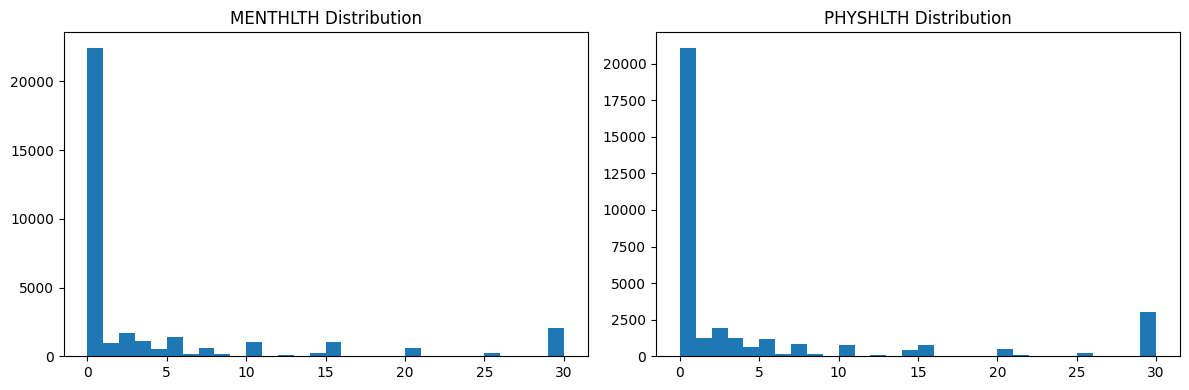

In [14]:
# Check distribution of health variables
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df_clean['MENTHLTH'], bins=30)
axes[0].set_title('MENTHLTH Distribution')
axes[1].hist(df_clean['PHYSHLTH'], bins=30)
axes[1].set_title('PHYSHLTH Distribution')
plt.tight_layout()
plt.show()

In [15]:
continuous_vars = ['_AGE80', 'MENTHLTH', 'PHYSHLTH']

for var in continuous_vars:
    Q1 = df_clean[var].quantile(0.25)
    Q3 = df_clean[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR
    outliers = df_clean[(df_clean[var] < lower) | (df_clean[var] > upper)]
    print(f"{var}: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)")

_AGE80: 0 (0.0%)
MENTHLTH: 4297 (12.5%)
PHYSHLTH: 3954 (11.5%)


In [16]:
df_clean[df_clean['MENTHLTH'] > 20]['MENTHLTH'].value_counts().sort_index()

MENTHLTH
21.00000      43
22.00000      13
23.00000       3
24.00000       9
25.00000     233
26.00000       7
27.00000      13
28.00000      55
29.00000      27
30.00000    2001
Name: count, dtype: int64

In [17]:
df_clean[df_clean['PHYSHLTH'] > 20]['PHYSHLTH'].value_counts().sort_index()

PHYSHLTH
21.00000      86
22.00000      14
23.00000       6
24.00000      16
25.00000     203
26.00000       3
27.00000      13
28.00000      53
29.00000      28
30.00000    3020
Name: count, dtype: int64

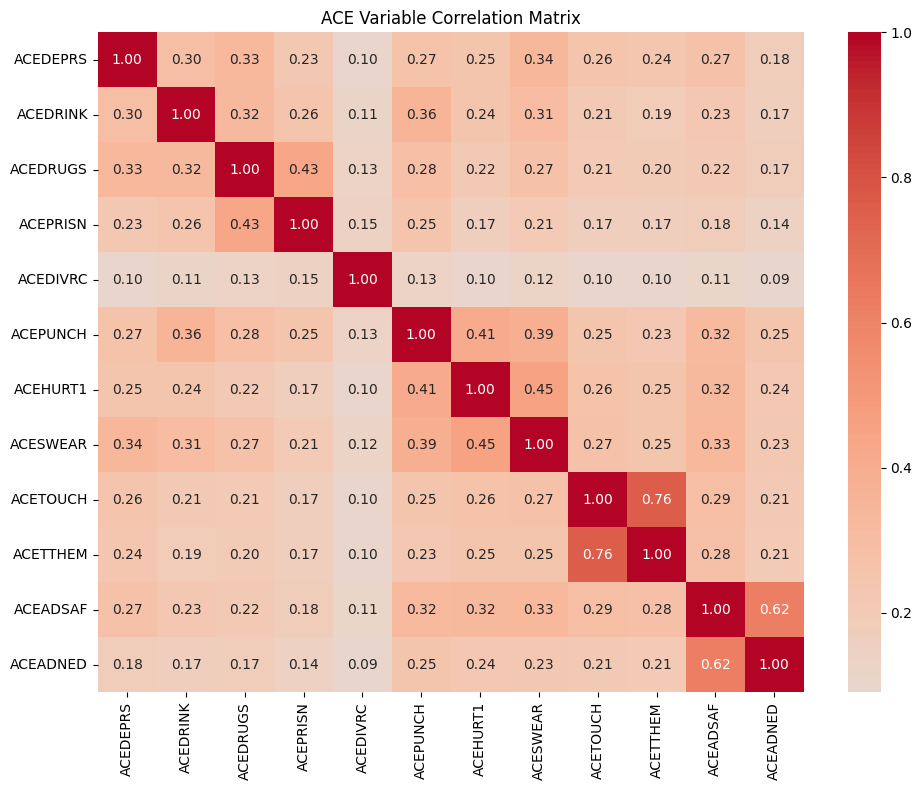

In [18]:
corr_matrix = df_clean[ace_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('ACE Variable Correlation Matrix')
plt.tight_layout()
plt.show()

In [19]:
X = df_clean.drop('risky_drinking', axis=1)
y = df_clean['risky_drinking']

# 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp
)

print(f"Train: {len(X_train):,} ({y_train.mean():.1%} risky)")
print(f"Val: {len(X_val):,} ({y_val.mean():.1%} risky)")
print(f"Test: {len(X_test):,} ({y_test.mean():.1%} risky)")

Train: 24,158 (37.7% risky)
Val: 5,178 (37.7% risky)
Test: 5,177 (37.7% risky)


In [20]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), 
    columns=X_train.columns, 
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val), 
    columns=X_val.columns, 
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), 
    columns=X_test.columns, 
    index=X_test.index
)

X_train_scaled.describe()

,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,...,_AGE80,_SEX,MENTHLTH,PHYSHLTH,_SMOKER3,race_2.0,race_3.0,race_4.0,race_5.0,race_6.0
count,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,...,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000,24158.00000
mean,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,...,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000
std,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,...,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002
min,-0.43062,-0.53277,-0.32071,-0.27548,-0.37749,-0.41550,-0.55829,-0.64918,-0.33563,-0.28806,...,-2.23604,-1.10629,-0.48642,-0.51736,-2.88334,-0.33732,-0.22923,-0.08927,-0.45755,-0.25721
25%,-0.43062,-0.53277,-0.32071,-0.27548,-0.37749,-0.41550,-0.55829,-0.64918,-0.33563,-0.28806,...,-0.77008,-1.10629,-0.48642,-0.51736,-0.53590,-0.33732,-0.22923,-0.08927,-0.45755,-0.25721
50%,-0.43062,-0.53277,-0.32071,-0.27548,-0.37749,-0.41550,-0.55829,-0.64918,-0.33563,-0.28806,...,0.24481,0.90392,-0.48642,-0.51736,0.63783,-0.33732,-0.22923,-0.08927,-0.45755,-0.25721
75%,-0.43062,-0.53277,-0.32071,-0.27548,0.62497,-0.41550,0.70883,1.63761,-0.33563,-0.28806,...,0.86502,0.90392,-0.11825,-0.07899,0.63783,-0.33732,-0.22923,-0.08927,-0.45755,-0.25721
max,2.32222,1.87700,3.11811,3.63005,7.64222,2.61566,1.97594,1.63761,3.38114,3.91427,...,1.25971,0.90392,3.19527,2.77038,0.63783,2.96454,4.36251,11.20186,2.18556,3.88794


In [21]:
# Sum of adverse experiences (0-10 scale)
X_train['ACE_SCORE'] = (
    X_train[binary_ace].sum(axis=1) + 
    (X_train[ordinal_ace] > 0).sum(axis=1)
)

X_val['ACE_SCORE'] = (
    X_val[binary_ace].sum(axis=1) + 
    (X_val[ordinal_ace] > 0).sum(axis=1)
)

X_test['ACE_SCORE'] = (
    X_test[binary_ace].sum(axis=1) + 
    (X_test[ordinal_ace] > 0).sum(axis=1)
)

X_train['ACE_SCORE'].value_counts().sort_index()

ACE_SCORE
0.00000     8914
1.00000     5533
2.00000     3230
3.00000     2091
4.00000     1403
5.00000     1007
6.00000      660
7.00000      429
8.00000      388
9.00000      229
10.00000     156
11.00000      40
12.00000      16
13.00000      14
14.00000      19
15.00000      13
16.00000       9
17.00000       7
Name: count, dtype: int64

In [23]:
# Save outputs to CSV for loading in EDA notebooks
X_train.to_csv('cleaned_x_train.csv', index=False)
y_train.to_csv('cleaned_y_train.csv', index=False)
X_val.to_csv('cleaned_x_val.csv', index=False)
y_val.to_csv('cleaned_y_val.csv', index=False)
X_test.to_csv('cleaned_x_test.csv', index=False)
y_test.to_csv('cleaned_y_test.csv', index=False)